# Exploratory Data Analysis (EDA) and Data Cleaning for Professor Basic Info Data (profs)

## Setup

In [176]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9

In [177]:
# read in data
profs = pd.read_csv("profs.csv")

## EDA

In [178]:
# view head and tail of data
profs

,Unnamed: 0,__typename,firstName,lastName,department,id,legacyId,numRatings,avgRating,avgDifficulty
0,0,Teacher,Robert,Borgen,Languages,VGVhY2hlci05NTY2,9566,39,3.3,2.9
1,1,Teacher,Aram,Yengoyan,Anthropology,VGVhY2hlci05NTY4,9568,47,2.6,2.7
2,2,Teacher,Patrick,Carroll-Burke,Social Science,VGVhY2hlci05NTcw,9570,13,3.2,3.1
3,3,Teacher,Henry,McHenry,Anthropology,VGVhY2hlci0xMzQ4MQ==,13481,124,4.5,2.5
4,4,Teacher,Peter,Rodman,Anthropology,VGVhY2hlci0yMjIzMA==,22230,73,3.8,3.6
...,...,...,...,...,...,...,...,...,...,...
3932,4466,Teacher,Chris,Nitta,Computer Science,VGVhY2hlci00NjU5MTM=,465913,189,2.3,4.3
3933,4467,Teacher,Daryl,Posnett,Computer Science,VGVhY2hlci0yNTA5NTcy,2509572,57,2.0,4.7
3934,4468,Teacher,Daniel,Ferenc,Science,VGVhY2hlci0xMjUyNjg=,125268,29,1.6,3.7
3935,4469,Teacher,Kenneth,Hilt,Biology,VGVhY2hlci0xNTE4OTQ=,151894,325,3.7,4.0


### Mean number of ratings for each professor

In [179]:
# mean number of ratings
profs['numRatings'].mean()

21.41529083058166

### Distribution of number of ratings for each professor

Text(0, 0.5, 'Number of Ratings')

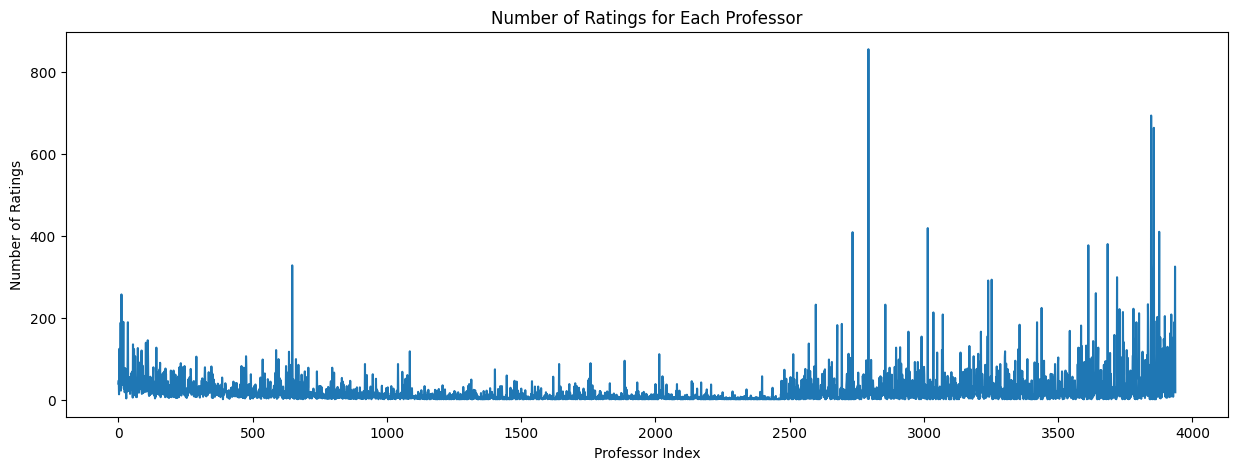

In [180]:
# quick plot of ratings
plt.figure(figsize=(15,5))
profs['numRatings'].plot()
plt.title('Number of Ratings for Each Professor')
plt.xlabel('Professor Index')
plt.ylabel('Number of Ratings')


### Who has the most ratings?

In [181]:
# prof with most ratings
profs.loc[profs['numRatings'].idxmax()]

Unnamed: 0                       3215
__typename                    Teacher
firstName                     Andreas
lastName                   Toupadakis
department                  Chemistry
id               VGVhY2hlci01NjE1OTk=
legacyId                       561599
numRatings                        856
avgRating                         3.3
avgDifficulty                     3.1
Name: 2793, dtype: object

### Histograms of Quality Rating and Difficulty Rating

Text(0.5, 1.0, 'Histogram of Average Professor Quality Rating')

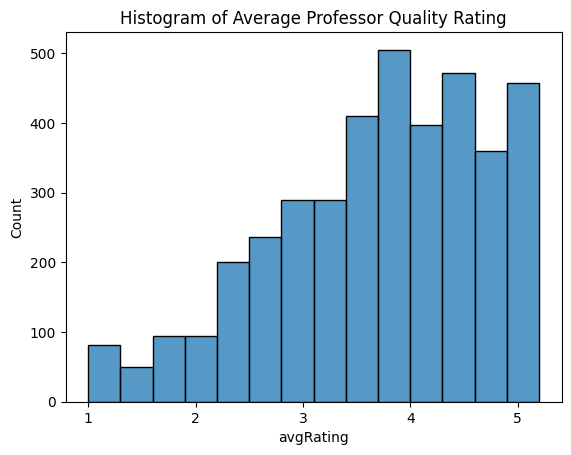

In [182]:
# histogram of average rating
sns.histplot(profs['avgRating'], binwidth=0.3)
plt.title("Histogram of Average Professor Quality Rating")

Text(0.5, 1.0, 'Histogram of Average Professor Difficulty Rating')

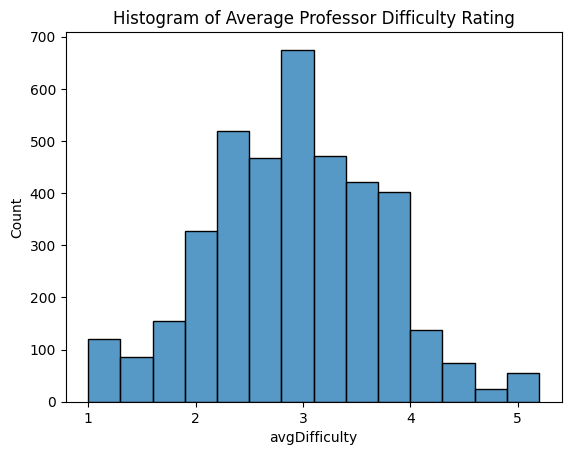

In [183]:
# histogram of average difficulty rating
sns.histplot(profs['avgDifficulty'], binwidth=0.3)
plt.title("Histogram of Average Professor Difficulty Rating")

### Relationship between Average Difficulty Rating and Average Quality Rating

Text(0.5, 0, 'Mean Difficulty Rating')

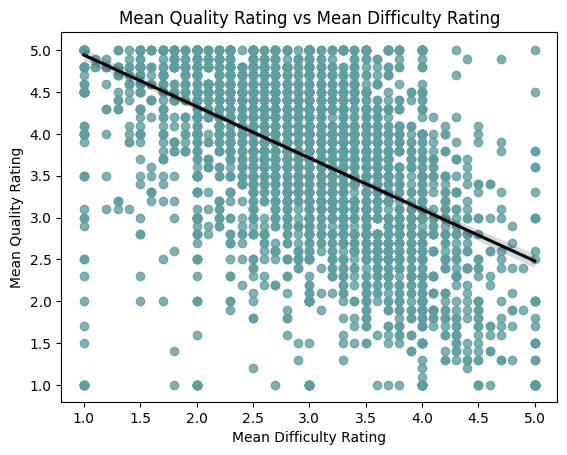

In [184]:
# scatterplot rating vs difficulty
sns.regplot(profs, x=profs['avgDifficulty'], y=profs['avgRating'],
            scatter_kws={"color": "cadetblue"},
            line_kws={"color": "black"})
plt.title("Mean Quality Rating vs Mean Difficulty Rating")
plt.ylabel("Mean Quality Rating")
plt.xlabel("Mean Difficulty Rating")

In [185]:
# correlation
corr = profs['avgRating'].corr(profs['avgDifficulty'])
print("Correlation between average rating and average dificulty is: ", corr)

Correlation between average rating and average dificulty is:  -0.513526981552611


### Quality Rankings, Difficulty Rankings, and Number of Reviews by Department

#### Quality

In [186]:
# group by department, aggregate avgRating by mean, numRatings by sum
rating_by_dept = profs.groupby('department', as_index = False).agg({'avgRating': 'mean', 'numRatings': 'sum'})

# round ratings
rating_by_dept['avgRating'] = rating_by_dept['avgRating'].round(decimals=2)

# sort by rating (descending)
rating_by_dept = rating_by_dept.sort_values(by='avgRating', ascending=False)

# reset index
rating_by_dept = rating_by_dept.reset_index(drop=True)

# view head, tail of dataframe
rating_by_dept

,department,avgRating,numRatings
0,Landscape Architecture amp Regional Planning,5.00,1
1,Landscape Architecture Regional Planning,5.00,2
2,Cell Biology & Neuroanatomy,5.00,13
3,Food Science amp Technology,5.00,3
4,Student Services,5.00,1
...,...,...,...
147,Agricultural & Resource Economics,2.96,218
148,Managerial Science,2.80,43
149,Business,2.78,29
150,Agricultural Engineering,2.75,15


Text(0.5, 0, 'Mean Quality Rating')

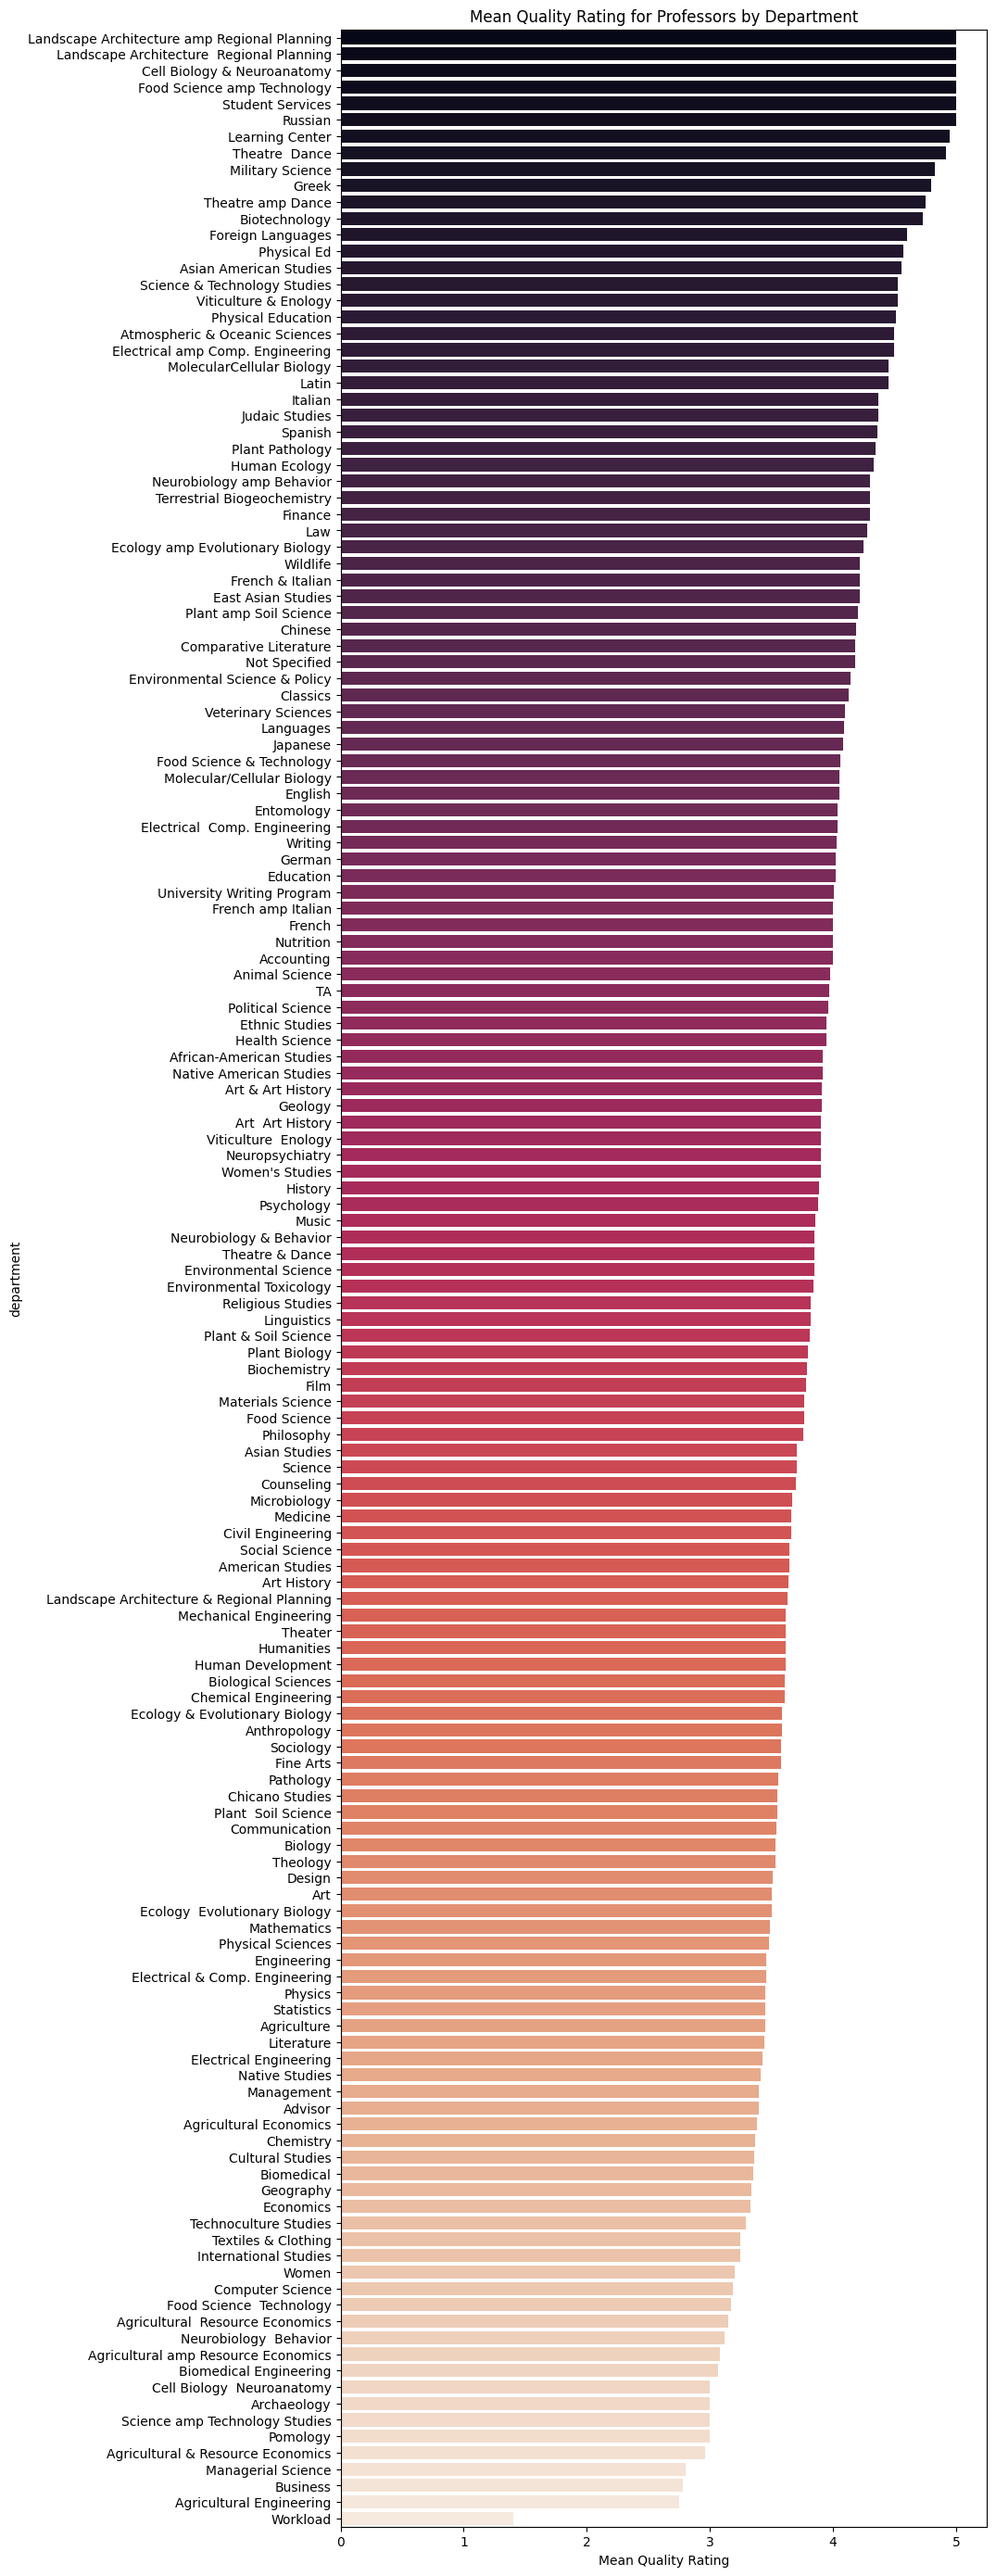

In [187]:
# rating by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(rating_by_dept, y=rating_by_dept['department'], x=rating_by_dept['avgRating'],
            palette="rocket")
plt.title("Mean Quality Rating for Professors by Department")
plt.xlabel("Mean Quality Rating")

Notes: 

* we have some cleaning to do with regards to department names. For example, we have: Art & Art History, Art Art History, Art History and Art all listed as separate departments.

* the number one and two departments have very few ratings because they are typos of a dept much lower on the list. this should be dealt with to produce a more realistic ranking

* what is "Workload", "TA", "Advisor" ? Sounds like user error when inputting department names.

In [188]:
# count number of unique departments
rating_by_dept['department'].nunique()


152

In [189]:
# inspect "Workload" department
rating_by_dept.loc[rating_by_dept['department'] == 'Workload']

,department,avgRating,numRatings
151,Workload,1.4,23


Strange that is a lot of ratings to be an error.

In [190]:
# inspect "TA" department
rating_by_dept.loc[rating_by_dept['department'] == 'TA']

,department,avgRating,numRatings
58,TA,3.97,65


65 ratings. Perhaps the user didn't know which department to put and the class was taught by a grad student TA? Or TA is an acronym?

In [191]:
# inspect "Advisor" department
rating_by_dept.loc[rating_by_dept['department'] == 'Advisor']

,department,avgRating,numRatings
126,Advisor,3.4,22


I suspect that for TA and Advisor, users are rating TA's and Advisors as if they are their own departments. Will need to inspect the webpages to confirm.

#### Where does the statistics department lie in quality rankings?

In [192]:
# view statistics department ranking/average
statsRating = rating_by_dept.loc[rating_by_dept['department'] == 'Statistics']
statsRating = statsRating.reset_index()
print(f"The statistics department is ranked {statsRating.iloc[0]['index']} out of {len(rating_by_dept)} departments with a mean professor quality rating of {statsRating.iloc[0]['avgRating']} and a\
 total of {statsRating.iloc[0]['numRatings']} reviews given.")

The statistics department is ranked 120 out of 152 departments with a mean professor quality rating of 3.45 and a total of 2163 reviews given.


### Difficulty

In [193]:
# group by department, aggregate avgDifficulty by mean, numRatings by sum
diff_by_dept = profs.groupby('department', as_index = False).agg({'avgDifficulty': 'mean', 'numRatings': 'sum'})

# round difficulty ratings
diff_by_dept['avgDifficulty'] = diff_by_dept['avgDifficulty'].round(decimals=2)

# sort by difficulty rating (descending)
diff_by_dept = diff_by_dept.sort_values(by='avgDifficulty', ascending=False)

# reset index
diff_by_dept = diff_by_dept.reset_index(drop=True)

# view head, tail of dataframe
diff_by_dept

,department,avgDifficulty,numRatings
0,Workload,4.60,23
1,Cell Biology Neuroanatomy,4.25,4
2,Managerial Science,4.00,43
3,Pomology,4.00,1
4,Agricultural amp Resource Economics,3.90,28
...,...,...,...
147,Learning Center,1.90,95
148,Physical Ed,1.82,199
149,Military Science,1.67,4
150,Physical Education,1.59,62


Text(0.5, 0, 'Mean Difficulty Rating')

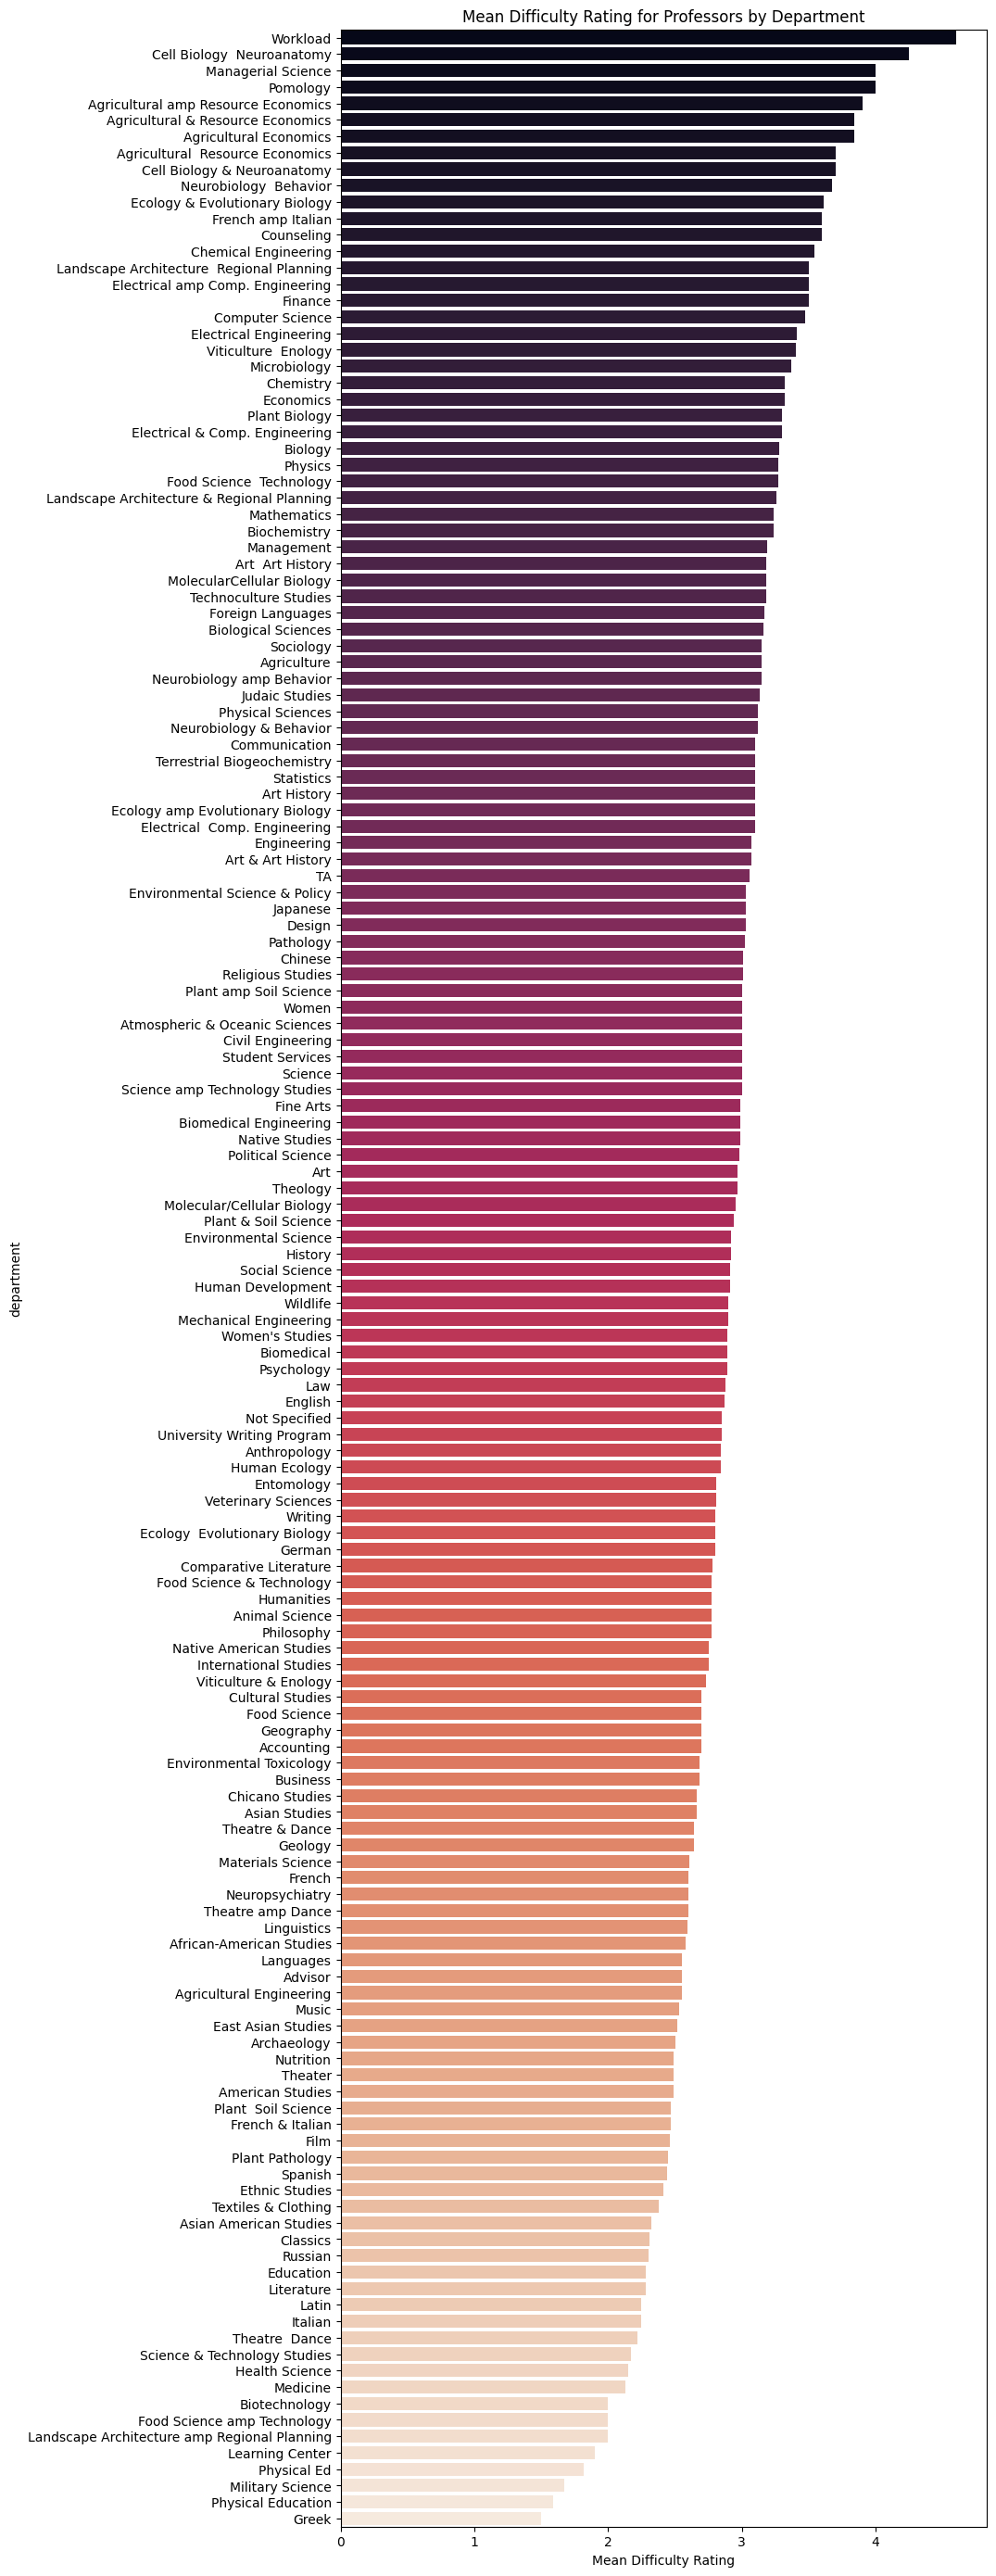

In [194]:
# difficulty by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(diff_by_dept, y=diff_by_dept['department'], x=diff_by_dept['avgDifficulty'],
            palette="rocket")
plt.title("Mean Difficulty Rating for Professors by Department")
plt.xlabel("Mean Difficulty Rating")

Notes:

* same issues as quality plot above. need to combine repeats and investigate nonsense.

* greek was very high in quality but is at the bottom of difficulty

#### Where does the statistics department lie in difficulty rankings?

In [195]:
# view statistics department ranking/average
statsDiff = diff_by_dept.loc[diff_by_dept['department'] == 'Statistics']
statsDiff = statsDiff.reset_index()
print(f"The statistics department is ranked {statsDiff.iloc[0]['index']} out of {len(diff_by_dept)} departments with a mean professor difficulty rating of {statsDiff.iloc[0]['avgDifficulty']} and a\
 total of {statsDiff.iloc[0]['numRatings']} reviews given.")

The statistics department is ranked 45 out of 152 departments with a mean professor difficulty rating of 3.1 and a total of 2163 reviews given.


#### Number of Ratings

In [196]:
# numRatings dataframe
num_by_dept = diff_by_dept[['department', 'numRatings']].sort_values(by='numRatings', ascending=False)
num_by_dept

,department,numRatings
29,Mathematics,9293
21,Chemistry,7715
83,English,4367
81,Psychology,4288
22,Economics,4052
...,...,...
14,Landscape Architecture Regional Planning,2
146,Landscape Architecture amp Regional Planning,1
64,Science amp Technology Studies,1
3,Pomology,1


Text(0.5, 0, 'Number of Ratings')

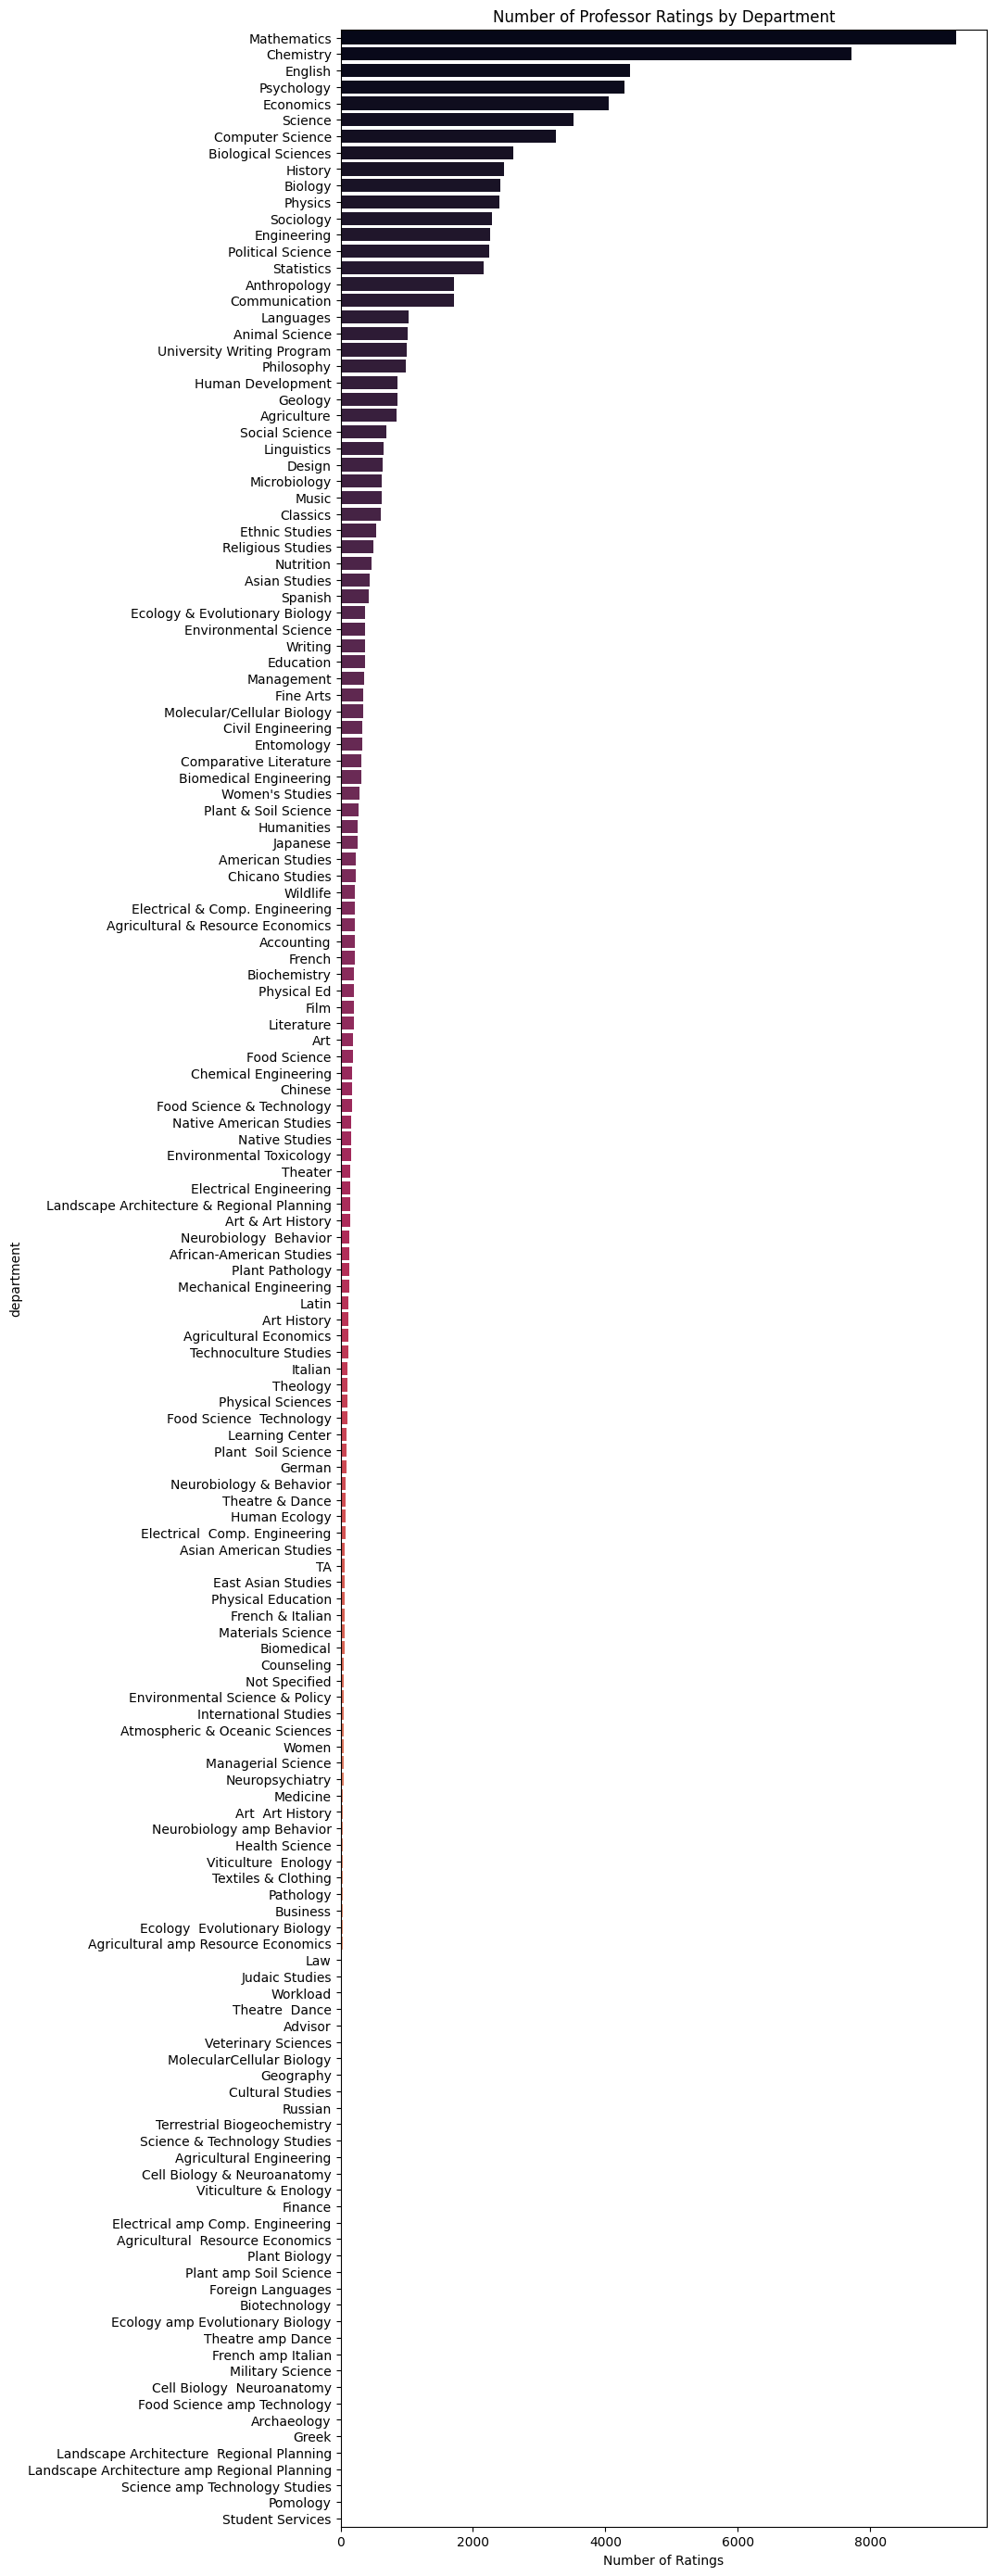

In [197]:
# number of ratings by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(num_by_dept, y=num_by_dept['department'], x=num_by_dept['numRatings'],
            palette="rocket")
plt.title("Number of Professor Ratings by Department")
plt.xlabel("Number of Ratings")

Notes:

* many of the departments high in quality ranking are low in number of review ranking. e.g. Greek, Cell Biology Neuroanatomy

* math and chem have way more ratings than most!

* Science has a lot of reviews, but this is a vague term that doesn't describe an actual department

## Cleaning

Many of the repeated departments happen where there is the word 'and' or an ampersand '&'.

In [198]:
## find all departments that contain an '&'
set(profs[profs['department'].str.contains('&')]['department'])

{'Agricultural & Resource Economics',
 'Art & Art History',
 'Atmospheric & Oceanic Sciences',
 'Cell Biology & Neuroanatomy',
 'Ecology & Evolutionary Biology',
 'Electrical & Comp. Engineering',
 'Environmental Science & Policy',
 'Food Science & Technology',
 'French & Italian',
 'Landscape Architecture & Regional Planning',
 'Neurobiology & Behavior',
 'Plant & Soil Science',
 'Science & Technology Studies',
 'Textiles & Clothing',
 'Theatre & Dance',
 'Viticulture & Enology'}

In [199]:
# compare to all departments that contain two spaces
set(profs[profs['department'].str.contains('  ')]['department'])

{'Agricultural  Resource Economics',
 'Art  Art History',
 'Cell Biology  Neuroanatomy',
 'Ecology  Evolutionary Biology',
 'Electrical  Comp. Engineering',
 'Food Science  Technology',
 'Landscape Architecture  Regional Planning',
 'Neurobiology  Behavior',
 'Plant  Soil Science',
 'Theatre  Dance',
 'Viticulture  Enology'}

In [200]:
# indexes for every row where 'department' contains two spaces
amp_ids = profs[profs['department'].str.contains('  ')].index

In [201]:
# replace missing ampersands
for i in amp_ids:
    profs['department'][i] = profs['department'][i].replace('  ', ' & ')

C:\Users\riley\AppData\Local\Temp\ipykernel_10396\2493451776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Some of the ampersands have been turned into 'amp'.

In [202]:
## find all departments that contain 'amp'
set(profs[profs['department'].str.contains('amp')]['department'])

{'Agricultural amp Resource Economics',
 'Ecology amp Evolutionary Biology',
 'Electrical amp Comp. Engineering',
 'Food Science amp Technology',
 'French amp Italian',
 'Landscape Architecture amp Regional Planning',
 'Neurobiology amp Behavior',
 'Plant amp Soil Science',
 'Science amp Technology Studies',
 'Theatre amp Dance'}

In [203]:
# indexes for every row where 'department' contains two spaces
amp_ids2 = profs[profs['department'].str.contains('amp')].index

In [204]:
# replace missing ampersands where 'amp'
for i in amp_ids2:
    profs['department'][i] = profs['department'][i].replace('amp', '&')

C:\Users\riley\AppData\Local\Temp\ipykernel_10396\3205186731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Function to correct department names

In [205]:
# define department correction function
def dept_comb(wrong: str, right: str):
    '''
    dept_comb takes the wrong department name in profs dataframe and converts it to the correct department name.
    Input:
    wrong - (str) department name to be changed
    right - (str) department name to keep
    '''
    # indexes for every row where 'department' is wrong
    w_id = profs[profs['department'].eq(wrong)].index

    # replace with correct department name
    for i in w_id:
        profs['department'][i] = profs['department'][i].replace(wrong, right)
    

Correct department names

In [206]:
# French & Italian
dept_comb("French", "French & Italian")
dept_comb("Italian", "French & Italian")

# Women's Studies
dept_comb("Women", "Women's Studies")

# Physical Education
dept_comb("Physical Ed", "Physical Education")

# Agricultural & Resource Economics
dept_comb("Agricultural Economics", "Agricultural & Resource Economics")

# Art & Art History
dept_comb("Art History", "Art & Art History")
dept_comb("Fine Arts", "Art & Art History")
dept_comb("Art", "Art & Art History")

# Spanish & Portuguese
dept_comb("Spanish", "Spanish & Portuguese")
dept_comb("Portuguese", "Spanish & Portuguese")

# German & Russian
dept_comb("German", "German & Russian")
dept_comb("Russian", "German & Russian")

# East Asian Languages & Cultures
dept_comb("Japanese", "East Asian Languages & Cultures")
dept_comb("Chinese", "East Asian Languages & Cultures")

C:\Users\riley\AppData\Local\Temp\ipykernel_10396\2224779831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


We'll also remove the departments that aren't real departments.

In [207]:
# departments to be removed
nonsense_depts = ['TA', 'Workload', 'Advisor', 'Student Services', 'Learning Center', 'Not Specified']

In [208]:
# filter out departments to be removed
profs = profs[~profs['department'].isin(nonsense_depts)]

In [209]:
# reset index
profs = profs.reset_index(drop=True)

__We can now conduct EDA with the cleaned data__

# EDA PART 2

In [210]:
# view head and tail of data
profs

,Unnamed: 0,__typename,firstName,lastName,department,id,legacyId,numRatings,avgRating,avgDifficulty
0,0,Teacher,Robert,Borgen,Languages,VGVhY2hlci05NTY2,9566,39,3.3,2.9
1,1,Teacher,Aram,Yengoyan,Anthropology,VGVhY2hlci05NTY4,9568,47,2.6,2.7
2,2,Teacher,Patrick,Carroll-Burke,Social Science,VGVhY2hlci05NTcw,9570,13,3.2,3.1
3,3,Teacher,Henry,McHenry,Anthropology,VGVhY2hlci0xMzQ4MQ==,13481,124,4.5,2.5
4,4,Teacher,Peter,Rodman,Anthropology,VGVhY2hlci0yMjIzMA==,22230,73,3.8,3.6
...,...,...,...,...,...,...,...,...,...,...
3906,4466,Teacher,Chris,Nitta,Computer Science,VGVhY2hlci00NjU5MTM=,465913,189,2.3,4.3
3907,4467,Teacher,Daryl,Posnett,Computer Science,VGVhY2hlci0yNTA5NTcy,2509572,57,2.0,4.7
3908,4468,Teacher,Daniel,Ferenc,Science,VGVhY2hlci0xMjUyNjg=,125268,29,1.6,3.7
3909,4469,Teacher,Kenneth,Hilt,Biology,VGVhY2hlci0xNTE4OTQ=,151894,325,3.7,4.0


### Mean number of ratings for each professor

In [211]:
# mean number of ratings
profs['numRatings'].mean()

21.49117872666837

### Distribution of number of ratings for each professor

Text(0, 0.5, 'Number of Ratings')

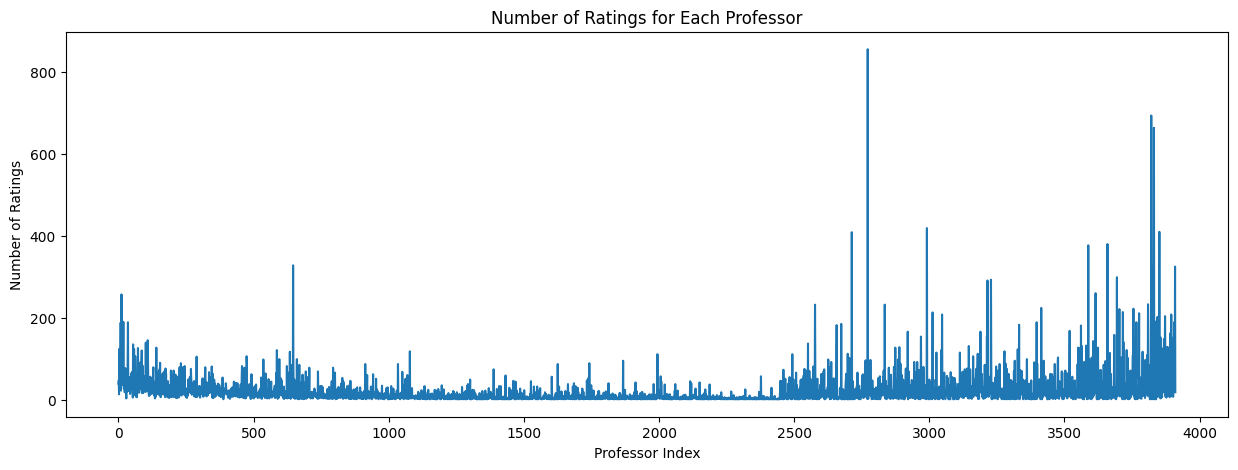

In [212]:
# quick plot of ratings
plt.figure(figsize=(15,5))
profs['numRatings'].plot()
plt.title('Number of Ratings for Each Professor')
plt.xlabel('Professor Index')
plt.ylabel('Number of Ratings')


### Who has the most ratings?

In [213]:
# prof with most ratings
profs.loc[profs['numRatings'].idxmax()]

Unnamed: 0                       3215
__typename                    Teacher
firstName                     Andreas
lastName                   Toupadakis
department                  Chemistry
id               VGVhY2hlci01NjE1OTk=
legacyId                       561599
numRatings                        856
avgRating                         3.3
avgDifficulty                     3.1
Name: 2772, dtype: object

### Histograms of Quality Rating and Difficulty Rating

Text(0.5, 1.0, 'Histogram of Average Professor Quality Rating')

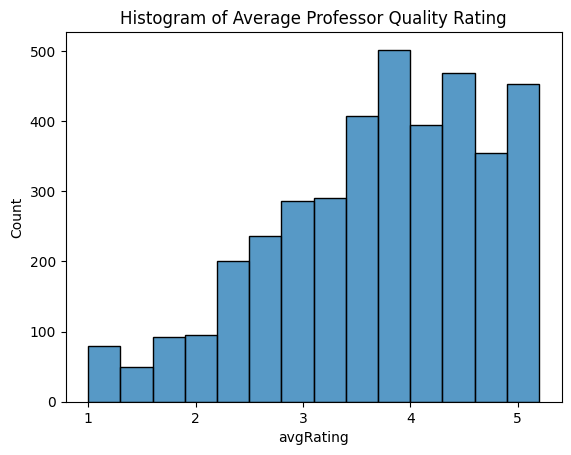

In [214]:
# histogram of average rating
sns.histplot(profs['avgRating'], binwidth=0.3)
plt.title("Histogram of Average Professor Quality Rating")

Text(0.5, 1.0, 'Histogram of Average Professor Difficulty Rating')

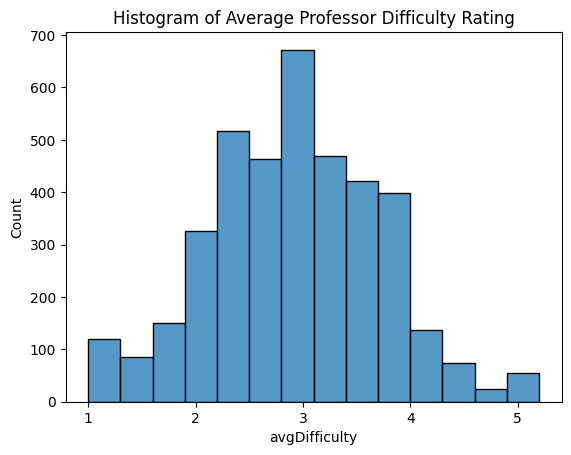

In [215]:
# histogram of average difficulty rating
sns.histplot(profs['avgDifficulty'], binwidth=0.3)
plt.title("Histogram of Average Professor Difficulty Rating")

### Relationship between Average Difficulty Rating and Average Quality Rating

Text(0.5, 0, 'Mean Difficulty')

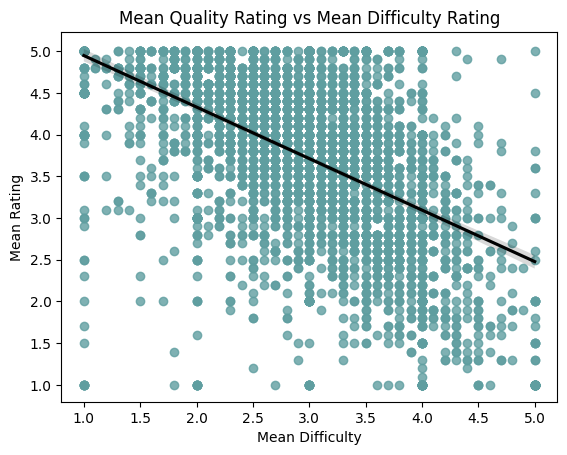

In [216]:
# scatterplot rating vs difficulty
sns.regplot(profs, x=profs['avgDifficulty'], y=profs['avgRating'],
            scatter_kws={"color": "cadetblue"},
            line_kws={"color": "black"})
plt.title("Mean Quality Rating vs Mean Difficulty Rating")
plt.ylabel("Mean Rating")
plt.xlabel("Mean Difficulty")

In [217]:
# correlation
corr = profs['avgRating'].corr(profs['avgDifficulty'])
print("Correlation between average rating and average dificulty is: ", corr)

Correlation between average rating and average dificulty is:  -0.5142576356569047


### Quality Rankings, Difficulty Rankings, and Number of Reviews by Department

This time, after we group by department, we will remove any departments with a total number of ratings less than 50. These are shown below.

In [218]:
# create and show list of departments with less than 30 total reviews 

# groupby depts aggregate sum of numRatings
num_by_dept = profs.groupby('department', as_index = False).agg({'numRatings': 'sum'})

# sort by number of ratings
num_by_dept = num_by_dept.sort_values(by='numRatings', ascending = False)

# remove departments with few ratings
num_by_dept = num_by_dept[num_by_dept['numRatings'] >= 50]

# reset index
num_by_dept = num_by_dept.reset_index(drop=True)

# create list of departments to be included
deptList = num_by_dept['department']

# show list
deptList

0                        Mathematics
1                          Chemistry
2                            English
3                         Psychology
4                          Economics
                   ...              
84                        Biomedical
85                        Counseling
86    Environmental Science & Policy
87             International Studies
88    Atmospheric & Oceanic Sciences
Name: department, Length: 89, dtype: object

#### Quality

In [219]:
# group by department, aggregate avgRating by mean, numRatings by sum
rating_by_dept = profs.groupby('department', as_index = False).agg({'avgRating': 'mean', 'numRatings': 'sum'})

# filter out depts with low number reviews
rating_by_dept = rating_by_dept[rating_by_dept['department'].isin(deptList)]

# round ratings
rating_by_dept['avgRating'] = rating_by_dept['avgRating'].round(decimals=2)

# sort by rating (descending)
rating_by_dept = rating_by_dept.sort_values(by='avgRating', ascending=False)

# reset index
rating_by_dept = rating_by_dept.reset_index(drop=True)

# view head, tail of dataframe
rating_by_dept

,department,avgRating,numRatings
0,Asian American Studies,4.56,69
1,Physical Education,4.53,261
2,Atmospheric & Oceanic Sciences,4.50,51
3,Latin,4.45,124
4,Spanish & Portuguese,4.36,425
...,...,...,...
84,Technoculture Studies,3.29,112
85,International Studies,3.25,53
86,Computer Science,3.19,3247
87,Agricultural & Resource Economics,3.12,371


Text(0.5, 0, 'Mean Quality Rating')

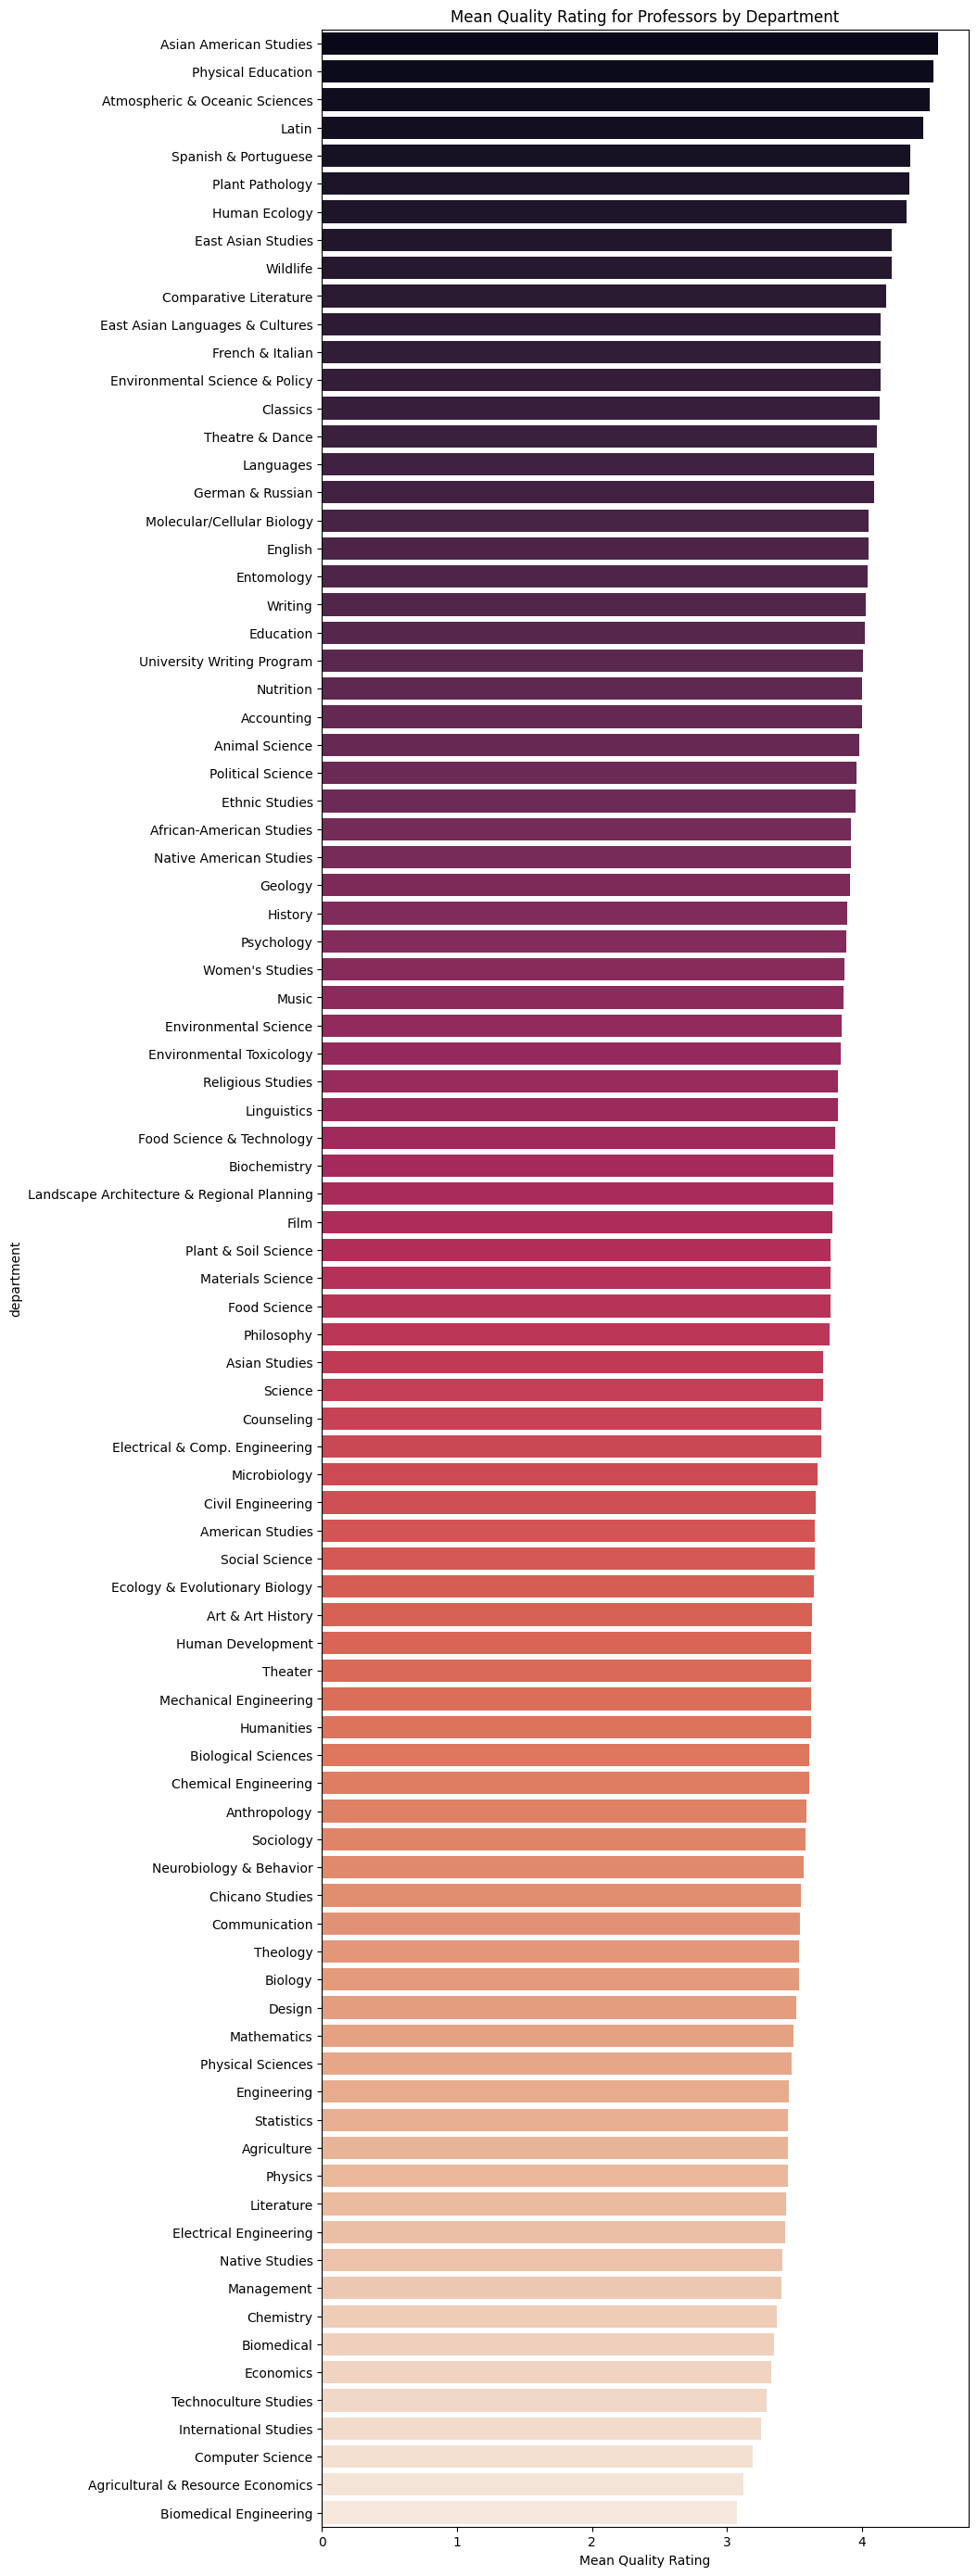

In [220]:
# rating by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(rating_by_dept, y=rating_by_dept['department'], x=rating_by_dept['avgRating'],
            palette="rocket")
plt.title("Mean Quality Rating for Professors by Department")
plt.xlabel("Mean Quality Rating")

In [221]:
# count number of unique departments
rating_by_dept['department'].nunique()


89

#### Where does the statistics department lie in quality rankings?

In [222]:
# view statistics department ranking/average
statsRating = rating_by_dept.loc[rating_by_dept['department'] == 'Statistics']
statsRating = statsRating.reset_index()
print(f"The statistics department is ranked {statsRating.iloc[0]['index']} out of {len(rating_by_dept)} departments with a mean professor quality rating of {statsRating.iloc[0]['avgRating']} and a\
 total of {statsRating.iloc[0]['numRatings']} reviews given.")

The statistics department is ranked 74 out of 89 departments with a mean professor quality rating of 3.45 and a total of 2163 reviews given.


### Difficulty

In [223]:
# group by department, aggregate avgDifficulty by mean, numRatings by sum
diff_by_dept = profs.groupby('department', as_index = False).agg({'avgDifficulty': 'mean', 'numRatings': 'sum'})

# filter out depts with low number reviews
diff_by_dept = diff_by_dept[diff_by_dept['department'].isin(deptList)]

# round difficulty ratings
diff_by_dept['avgDifficulty'] = diff_by_dept['avgDifficulty'].round(decimals=2)

# sort by difficulty rating (descending)
diff_by_dept = diff_by_dept.sort_values(by='avgDifficulty', ascending=False)

# reset index
diff_by_dept = diff_by_dept.reset_index(drop=True)

# view head, tail of dataframe
diff_by_dept

,department,avgDifficulty,numRatings
0,Agricultural & Resource Economics,3.84,371
1,Counseling,3.60,55
2,Chemical Engineering,3.54,178
3,Computer Science,3.47,3247
4,Ecology & Evolutionary Biology,3.45,410
...,...,...,...
84,Classics,2.31,613
85,Education,2.28,370
86,Literature,2.28,196
87,Latin,2.25,124


Text(0.5, 0, 'Mean Difficulty Rating')

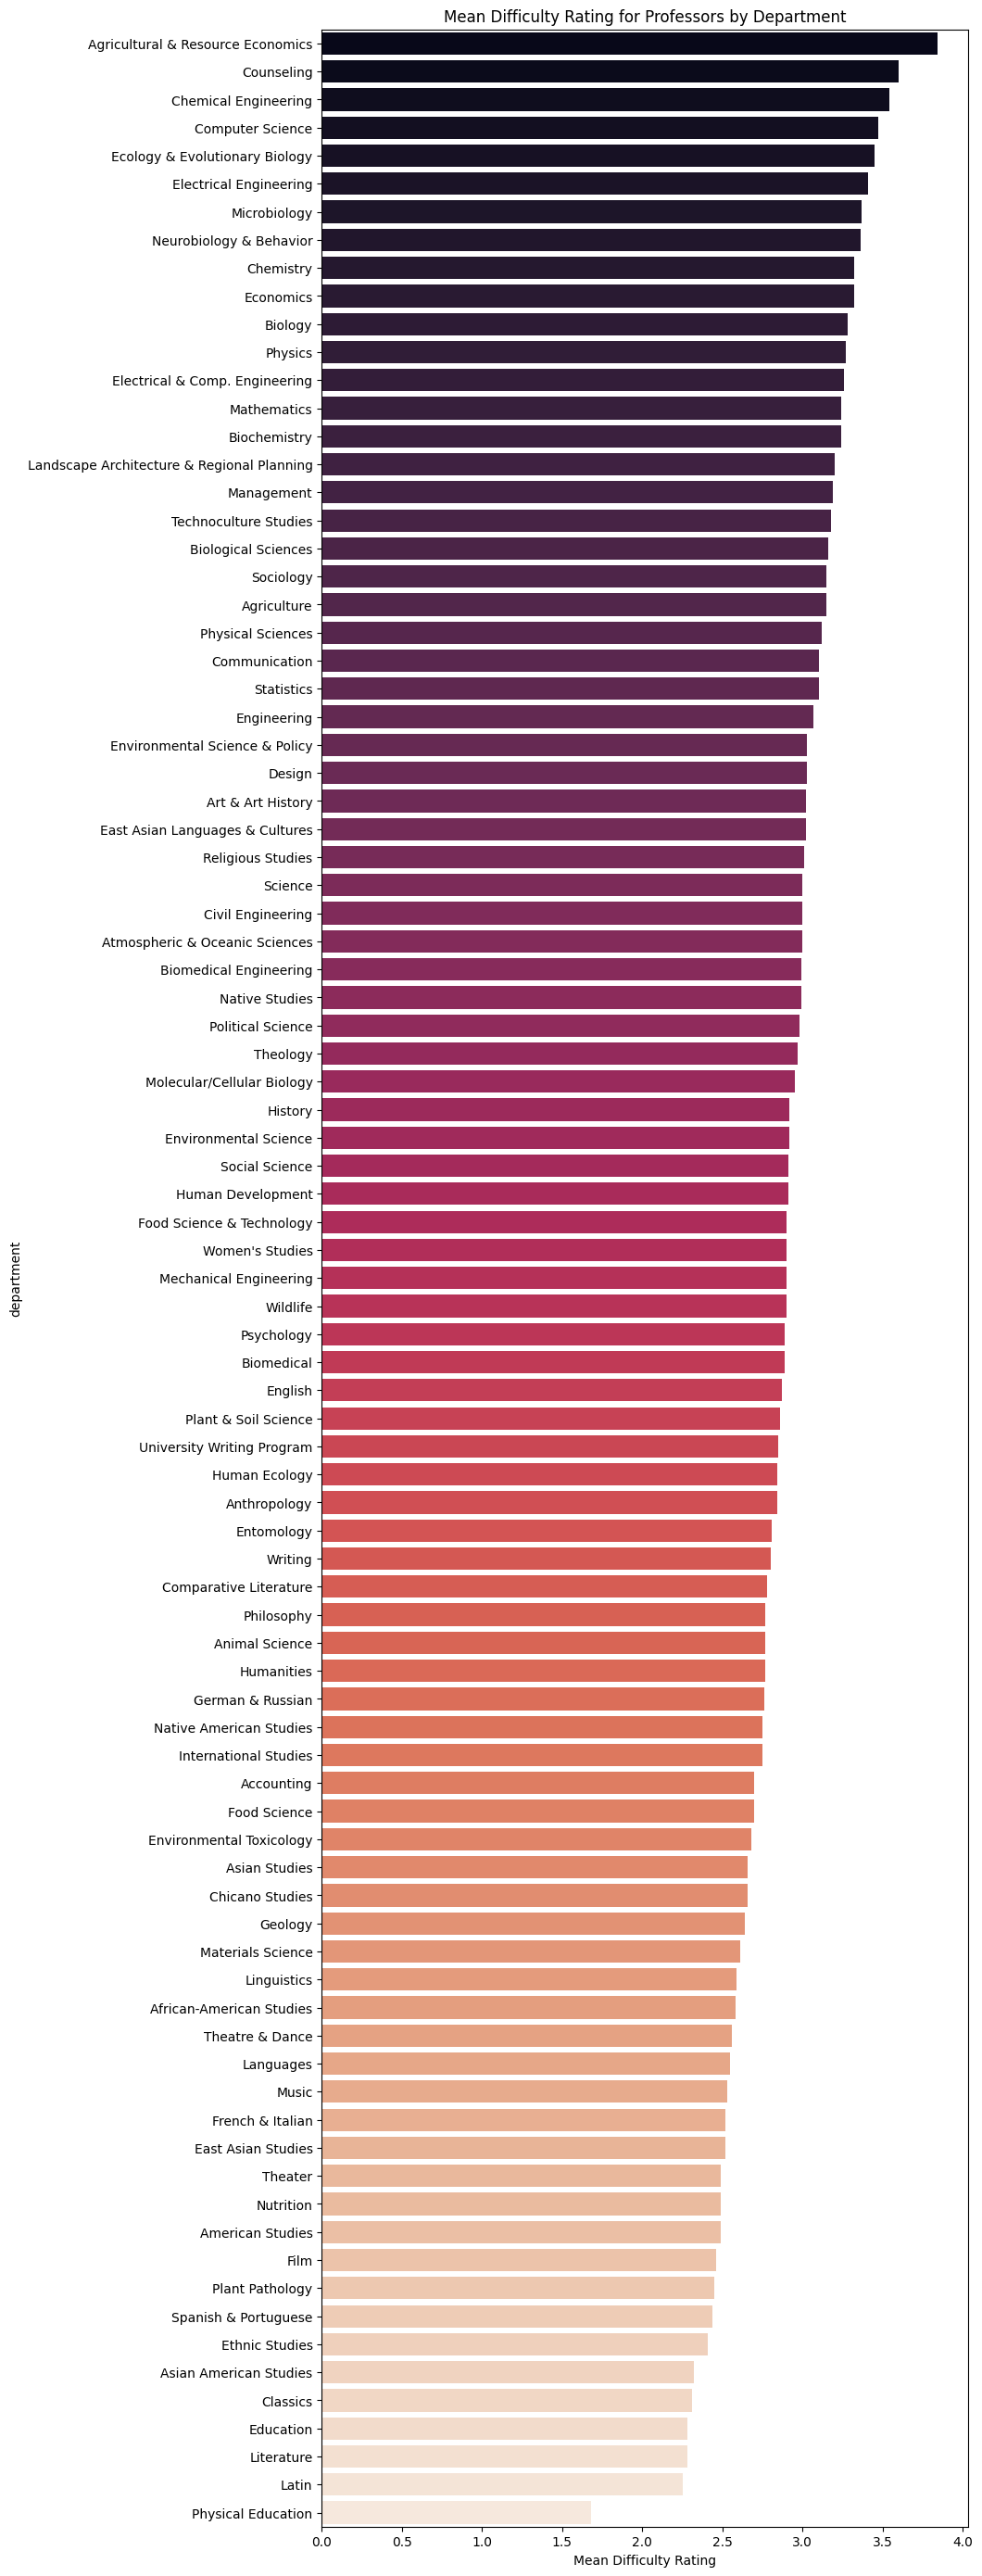

In [224]:
# difficulty by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(diff_by_dept, y=diff_by_dept['department'], x=diff_by_dept['avgDifficulty'],
            palette="rocket")
plt.title("Mean Difficulty Rating for Professors by Department")
plt.xlabel("Mean Difficulty Rating")

#### Where does the statistics department lie in difficulty rankings?

In [225]:
# view statistics department ranking/average
statsDiff = diff_by_dept.loc[diff_by_dept['department'] == 'Statistics']
statsDiff = statsDiff.reset_index()
print(f"The statistics department is ranked {statsDiff.iloc[0]['index']} out of {len(diff_by_dept)} departments with a mean professor difficulty rating of {statsDiff.iloc[0]['avgDifficulty']} and a\
 total of {statsDiff.iloc[0]['numRatings']} reviews given.")

The statistics department is ranked 23 out of 89 departments with a mean professor difficulty rating of 3.1 and a total of 2163 reviews given.


#### Number of Ratings

In [226]:
# numRatings dataframe
num_by_dept = diff_by_dept[['department', 'numRatings']].sort_values(by='numRatings', ascending=False)

num_by_dept

,department,numRatings
13,Mathematics,9293
8,Chemistry,7715
48,English,4367
46,Psychology,4288
9,Economics,4052
...,...,...
47,Biomedical,57
1,Counseling,55
25,Environmental Science & Policy,54
61,International Studies,53


Before filtering out depts with low number of ratings.

Text(0.5, 0, 'Number of Ratings')

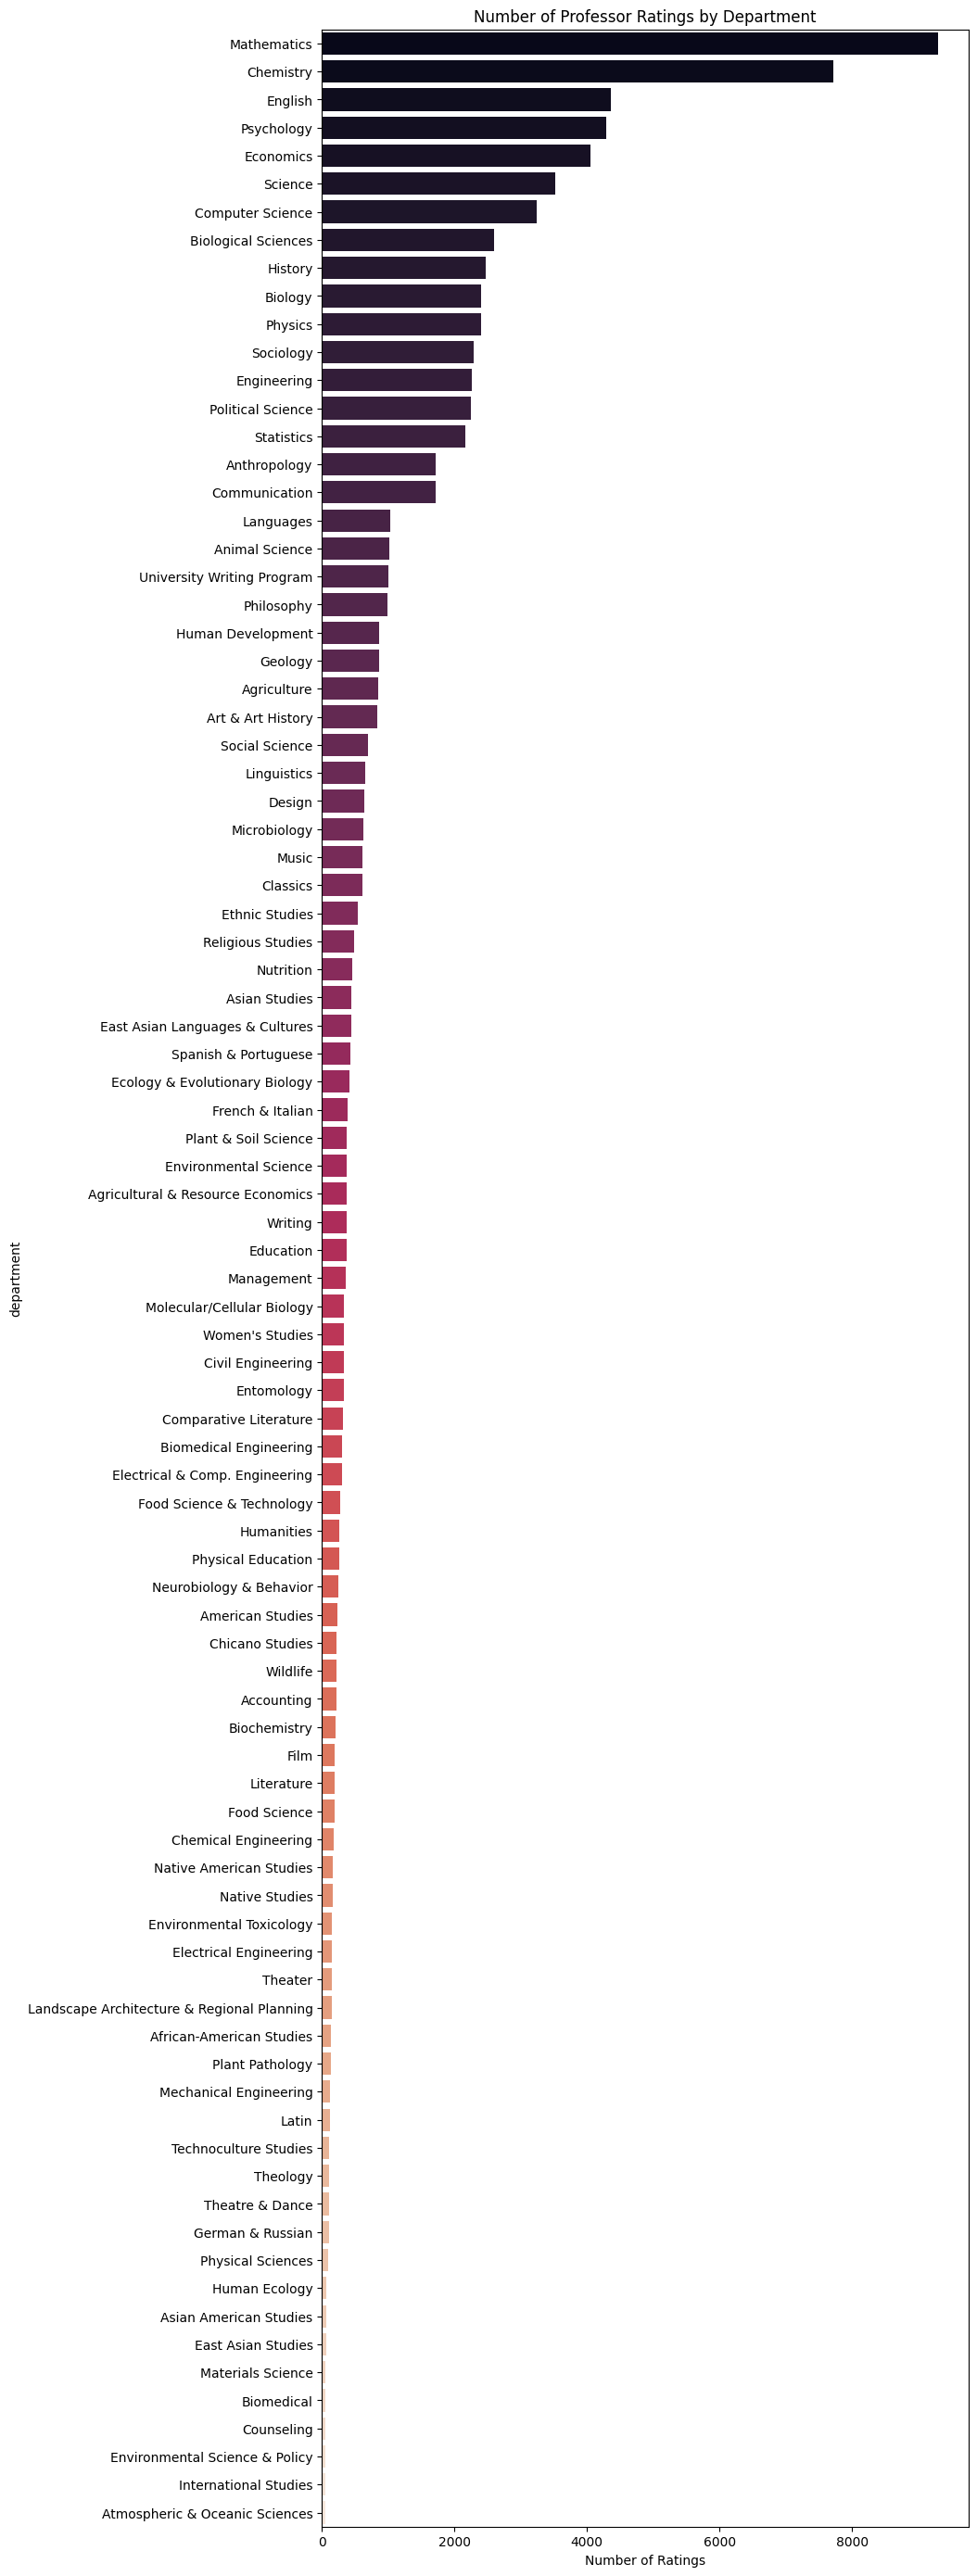

In [227]:
# number of ratings by dept barplot
plt.figure(figsize=(9,35))
sns.barplot(num_by_dept, y=num_by_dept['department'], x=num_by_dept['numRatings'],
            palette="rocket")
plt.title("Number of Professor Ratings by Department")
plt.xlabel("Number of Ratings")